In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import fetch_openml
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
import xgboost
from xgboost import XGBRegressor, callback

import warnings
warnings.filterwarnings("ignore")

In [2]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [3]:
voting_clf = VotingClassifier(
    estimators=[('rl', log_clf), ('svc', svm_clf), ('rf', rnd_clf)],
    voting='soft'
)

In [4]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rl', LogisticRegression(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42))],
                 voting='soft')

In [6]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


In [7]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [8]:
accuracy_score(y_test, y_pred)

0.912

In [9]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)

In [10]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True)

In [11]:
bag_clf.oob_score_

0.8986666666666666

In [12]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.896

In [13]:
bag_clf.oob_decision_function_[:5]

array([[0.38497653, 0.61502347],
       [0.3559322 , 0.6440678 ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [14]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,n_jobs=-1)

In [15]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [16]:
y_preb = rnd_clf.predict(X_test)

In [17]:
accuracy_score(y_test, y_preb)

0.92

In [18]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

In [19]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=16,
                                                   splitter='random'),
                  n_estimators=500, n_jobs=-1)

In [20]:
y_preb = bag_clf.predict(X_test)

In [21]:
accuracy_score(y_test, y_preb)

0.912

In [22]:
ext_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

In [23]:
ext_clf.fit(X_train, y_train)

ExtraTreesClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [24]:
y_pred = ext_clf.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.912

In [26]:
ext_clf.feature_importances_

array([0.42531408, 0.57468592])

In [27]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [28]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(random_state=42)

In [29]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

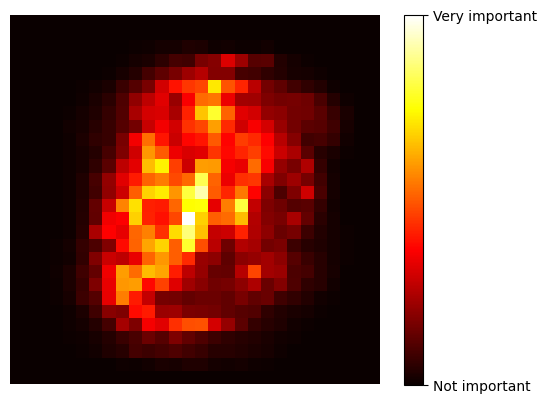

In [30]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

In [31]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=100)

In [32]:
y_pred = ada_clf.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.912

In [34]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)

In [35]:
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [36]:
y_pred = gbrt.predict(X_test)

In [37]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [38]:
mse, r2

(0.08239669753072185, 0.6702232584739936)

In [39]:
np.var(y_test)

0.249856

In [40]:
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
print("Baseline R²:", r2_score(y_test, y_pred_dummy))


Baseline R²: -0.0010245901639345245


In [41]:
print("Train R²:", r2_score(y_train, gbrt.predict(X_train)))

Train R²: 0.7203656386543351


In [42]:
X_train, X_val, y_train, y_val = train_test_split(X,y)

In [43]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)

In [44]:
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=120)

In [45]:
errors = [mean_squared_error(y_val, y_pred)
    for y_pred in gbrt.staged_predict(X_val)]

In [46]:
bst_n_estimators = np.argmin(errors)

In [47]:
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=67)

In [48]:
y_pred = gbrt_best.predict(X_test)
mean_squared_error(y_test, y_pred)

0.05985011278734654

In [49]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

In [50]:
min_val_error = float('inf')
error_going_up = 0

In [51]:
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break

In [52]:
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

In [53]:
mean_squared_error(y_val, y_pred)

0.12324771986630273

In [54]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')

In [55]:
X,y = mnist.data, mnist.target

In [56]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=20000, stratify=y, random_state=42)

In [57]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=10000, stratify=y_temp, random_state=42)

In [58]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(probability=True, kernel='rbf', random_state=42)

In [59]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
et_clf.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [61]:
svm_clf.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [62]:
voting_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('et', et_clf), ('svm', svm_clf)],
    voting='soft'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('et', ExtraTreesClassifier(random_state=42)),
                             ('svm', SVC(probability=True, random_state=42))],
                 voting='soft')

In [63]:
models = {'Random_Forest': rf_clf, 'Extra_Trees': et_clf, 'SVM': svm_clf, 'Voting': voting_clf}

In [65]:
for name, model in models.items():
    y_pred = model.predict(X_val)
    print(f"{name} Accuracy: {accuracy_score(y_val, y_pred):.4f}")

Random_Forest Accuracy: 0.9669
Extra_Trees Accuracy: 0.9704
SVM Accuracy: 0.9771
Voting Accuracy: 0.9771


In [67]:
y_test_pred = voting_clf.predict(X_test)
print(f"Final Ensemble Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

Final Ensemble Test Accuracy: 0.9780


In [69]:
y_test_pred = svm_clf.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9769